#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   José Francisco Muñoz Del Angel - A01794174
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import zipfile
from io import BytesIO
from sklearn.impute import SimpleImputer


from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold














Citation Request:

   This dataset is public available for research. The details are described in (Moro et al., 2016).
   Please include this citation if you plan to use this database: 

   (Moro et al., 2016) S. Moro, P. Rita and B. Vala. Predicting social media performance metrics and evaluation 
   of the impact on brand building: A data mining approach. Journal of Business Research, Elsevier, In press.
 
   Available at: http://dx.doi.org/10.1016/j.jbusres.2016.02.010


1. Title: Facebook performance metrics

2. Sources
   Created by: Sérgio Moro, Paulo Rita and Bernardo Vala (ISCTE-IUL) @ 2016
   
3. Past Usage:

   The full dataset was described and analyzed in:

   S. Moro, P. Rita and B. Vala. Predicting social media performance metrics and evaluation of the impact on 
   brand building: A data mining approach. Journal of Business Research, Elsevier, In press, Available online 
   since 28 February 2016.

4. Relevant Information:

   The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.
   This dataset contains 500 of the 790 rows and part of the features analyzed by Moro et al. (2016). The remaining were 
   omitted due to confidentiality issues.


5. Number of Instances: 500

6. Number of Attributes: 19

7. Attribute information:

   It includes 7 features known prior to post publication and 12 features for evaluating post impact (see Tables 2 and 3 
   from Moro et al., 2016 - complete reference in the "Citation Request")

8. Missing Attribute Values: None


#**Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las
mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables
que indican los autores en la Tabla 3 del artículo citado.

In [ ]:
# Importación de datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'
r = requests.get(url)
buf1 = BytesIO(r.content)
with zipfile.ZipFile(buf1, "r") as f:
    for name in f.namelist():
        if name.endswith('.csv'):
            with f.open(name) as zd:
                df = pd.read_csv(zd, encoding='latin1', sep=';')
            break
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
# Renombramiento de columna.
df.rename(columns = {'Lifetime People who have liked your Page and engaged with your post':'LPE'}, inplace = True)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
# Hacemos un analisis rapido del contenido del dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Page total likes                                              500 non-null    int64  
 1   Type                                                          500 non-null    object 
 2   Category                                                      500 non-null    int64  
 3   Post Month                                                    500 non-null    int64  
 4   Post Weekday                                                  500 non-null    int64  
 5   Post Hour                                                     500 non-null    int64  
 6   Paid                                                          499 non-null    float64
 7   Lifetime Post Total Reach                                     500 non-n

In [ ]:
# Verificamos si existen valores NaN en nuestro dataframe.
df.isnull().sum()

Page total likes                                                0
Type                                                            0
Category                                                        0
Post Month                                                      0
Post Weekday                                                    0
Post Hour                                                       0
Paid                                                            1
Lifetime Post Total Reach                                       0
Lifetime Post Total Impressions                                 0
Lifetime Engaged Users                                          0
Lifetime Post Consumers                                         0
Lifetime Post Consumptions                                      0
Lifetime Post Impressions by people who have liked your Page    0
Lifetime Post reach by people who like your Page                0
LPE                                                             0
comment   

Encontramos que e debe de ralizar una limpieza de datos, pero primero acotaremos los datos con los cuale strabajaremos.  

In [ ]:
# Definimos nuestros datos de entrada y salida.                
X = df[['Category', 'Page total likes',    # Variables de entrada
        'Post Month', 'Post Hour',
        'Post Weekday', 'Paid']]         
Y = df[['LPE']]                            # Variable de salida    

In [ ]:
numeric_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')), #si hay datos perdidos númericos/continuos se puede aplicar la mediana
                                 ('escalaNum', MinMaxScaler(feature_range=(0,1)))])  #variables numéricas se colocan en rango
numeric_pipeline_nombres = ['Paid'] #Transformacion de categóricas númericas/continuas

In [ ]:
# X, Y, cc = make_regression(n_samples=10000,   # total de observaciones a generar
#                           n_features=8,       # número de factores a generar, tanto informativos, como redundantes
#                           n_informative=4,    # número de factores informativos o independientes a generar
#                           noise=0.5,          # desviación estándar del ruido gaussiano agregado a la variable de salida.
#                           coef=True,          # nos regresa los coeficientes reales del modelo subyacente generado.
#                           random_state=0      # semilla
#                           )


# print(X.shape, Y.shape)

In [ ]:
# cc

#**Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y
validación.

In [ ]:
# Se realiza la particón de datos, en un grupo de 100 de prueba y 400 se repartirán entre entrenamiento y validación.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 7)
print(Xtrain.shape, ': Dimensión de datos de entrada para entrenamiento.')
print(Xtest.shape, ': Dimensión de datos de entrada para prueba.')  
print(Ytrain.shape, ': Dimensión de variable de salida para entrenamiento.')
print(Ytest.shape, ': Dimensión de variable de salida para prueba.')

(400, 6) : Dimensión de datos de entrada para entrenamiento.
(100, 6) : Dimensión de datos de entrada para prueba.
(400, 1) : Dimensión de variable de salida para entrenamiento.
(100, 1) : Dimensión de variable de salida para prueba.


#**Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el
error porcentual absoluto medio MAPE.

In [ ]:
# Calculo de MAE.
def MAE(Ytest, Ypred):
    MAE = mean_absolute_error(Ytest, Ypred)
    return(MAE)

# Calculos de RMSE.
def RMSE(Ytest, Ypred):
    RMSE = np.sqrt(mean_squared_error(Ytest, Ypred))
    return(RMSE)

# Calculo de MAPE.
def MAPE(Ytest, Ypred):
    MAPE = np.mean(np.abs((Ytest - Ypred) / Ytest)) * 100
    return(MAPE)

#**Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida.
Utiliza un Pipeline para evitar el filtrado de información.

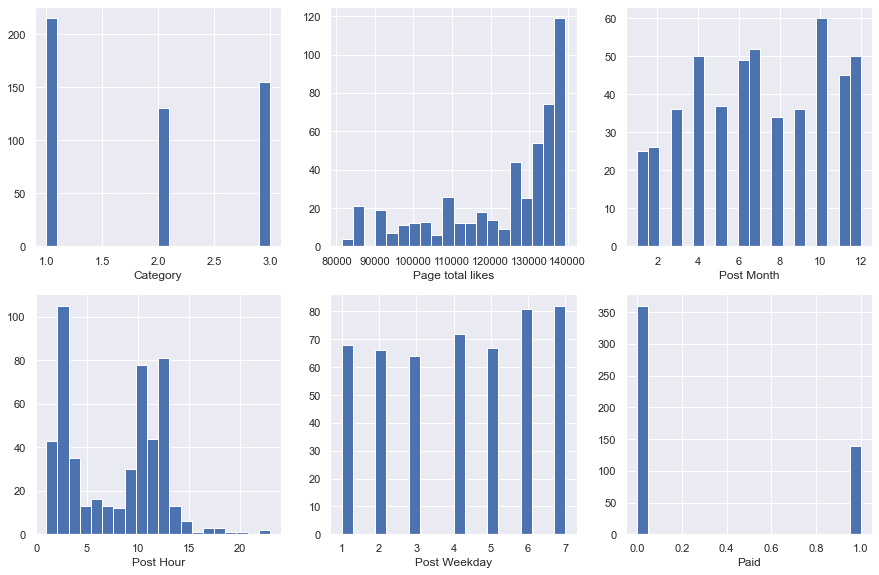

In [ ]:
variables = ['Category', 'Page total likes',
            'Post Month', 'Post Hour', 
            'Post Weekday', 'Paid']

for x in range(0,6):
    plt.subplot(3,3, x+1) 
    var = df[variables[x]]
    
    plt.hist(var, bins=20)
    plt.xlabel(variables[x])
plt.show()


<AxesSubplot:>

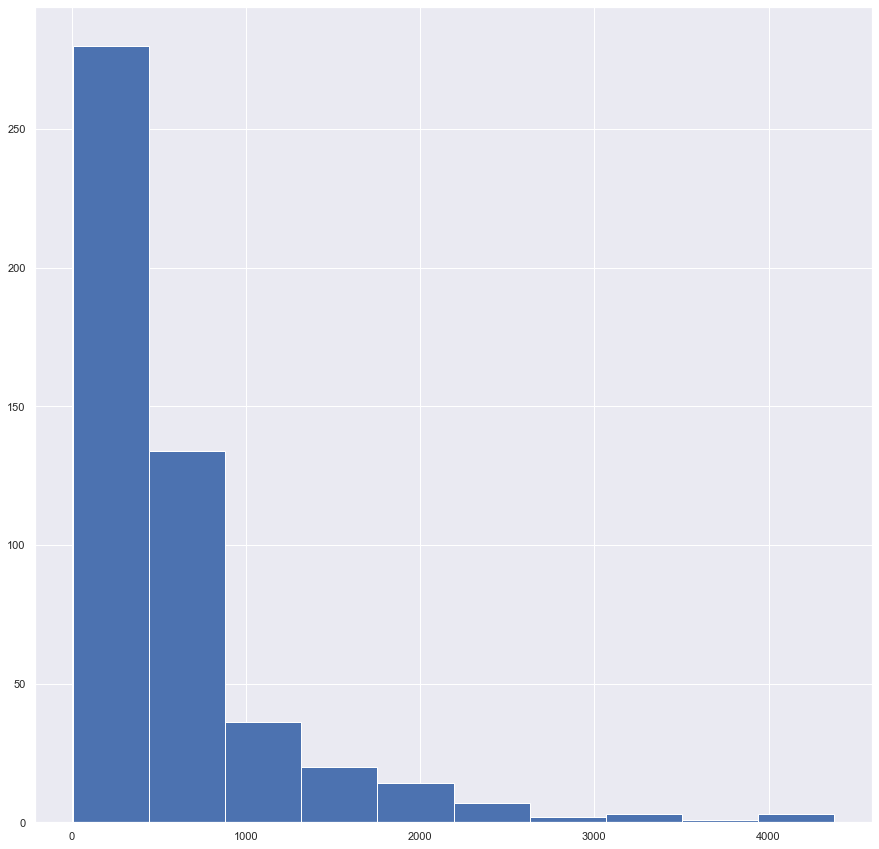

In [ ]:

df['LPE'].hist()

In [ ]:
# Transformaciones a factores cualitativos de entrada y salida:
#Se usa la mediana para imputar ya que se trata de variables numéricas en caso de que haya valores perdidos.
numeric_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy = 'median')),
                                    ('escalaNum', MinMaxScaler(feature_range = (0,1)))])
numeric_pipeline_nombres = ['Page total likes', 'Post Month', 'Post Hour','Post Weekday', 'LPE']

# Transformaciones a factores categoricos de entrada:
#Se usa la moda para imputar ya que se trata de variables categóricas en caso de que haya valores perdidos.
categ_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy = 'most_frequent'))])
categ_pipeline_nombres = ['Category']

# Transformaciones One-Hot encoding a las variables de entrada de tipo categórico y binaria:
cat_binOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy = 'most_frequent')),
                                     ('oneHotE', OneHotEncoder(handle_unknown = 'ignore'))])
cat_binOHE_pipeline_nombres = ['Paid'] #Variables binarias

Justificación: 



In [ ]:
colunmTransformer = ColumnTransformer(transformers= [('numpipe', numeric_pipeline, numeric_pipeline_nombres),
                                                     ('catpipe', categ_pipeline, categ_pipeline_nombres),
                                                     ('binpipe', cat_binOHE_pipeline, cat_binOHE_pipeline_nombres),],
                                                     remainder='passthrough')

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la
actividad. Consulta su documentación correspondiente:

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [ ]:
# Se hace un modelo Dummy con regresion para poderla comparar con el ejercicio 3. 
Xtrain_dummy, Xtest_dummy, Ytrain_dummy, Ytest_dummy = train_test_split(Xtrain, Ytrain, test_size = 0.25, random_state = 7)
print(Xtrain_dummy.shape, ': Dimensión de datos de entrada dummy para entrenamiento.')
print(Xtest_dummy.shape, ': Dimensión de datos de entrada dummy para prueba.')  
print(Ytrain_dummy.shape, ': Dimensión de variable de salida dummy para entrenamiento.')
print(Ytest_dummy.shape, ': Dimensión de variable de salida dummy para prueba.')


(300, 6) : Dimensión de datos de entrada dummy para entrenamiento.
(100, 6) : Dimensión de datos de entrada dummy para prueba.
(300, 1) : Dimensión de variable de salida dummy para entrenamiento.
(100, 1) : Dimensión de variable de salida dummy para prueba.


In [ ]:
LRdummy = DummyRegressor(strategy = 'mean').fit(Xtrain_dummy, Ytrain_dummy)
Ypred_dummy = LRdummy.predict(Xtest_dummy)
  
# Calculo de MAE.
MAE = mean_absolute_error(Ytest_dummy, Ypred_dummy)
print("El valor de MAE dummy es de ", MAE)

# Calculos de RMSE.
RMSE = np.sqrt(mean_squared_error(Ytest_dummy, Ypred_dummy))
print("El valor de RMSE dummy es de ", RMSE)

# # Calculo de MAPE.
# MAPE = np.mean(np.abs((Ytest_dummy - Ypred_dummy) / Ytest_dummy)) * 100
# print("El valor de MAPE dummy es de ", MAPE)

El valor de MAE dummy es de  386.53573333333327
El valor de RMSE dummy es de  568.1433815019273


#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de
iteraciones para que todos los modelos converjan.

In [ ]:
#Definición de los módelos a evaluar

def get_models():
  modelos = list()
  nombres = list()

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RFC - Random Forest:
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')

  # Perceptrón multicapa
  modelos.append(MLPRegressor())
  nombres.append('MLP')

  return modelos, nombres

In [ ]:
esultados=list()

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])]) #a cada iteración de modelos se da uno de los previamente definidos

#Acorde a la instrucción, se toman las 5 particiones y las 3 repeticiones
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0) 
    
#Cálculo de métricas
  mismetricas_ = {'accuracy':make_scorer(mi_accuracy), 'recall':make_scorer(mi_recall), 
                  'gmean':make_scorer(mi_gmean),'precision':make_scorer(mi_precision),
                  'fscore':make_scorer(mi_fscore) }

#Se hace la validación cruzada
  resultadosOU = cross_validate(pipeline, 
                          Xtrain, np.ravel(Ytrain),
                          scoring=mismetricas_,
                          cv=cv,
                          return_train_score=True)
 
  resultados.append(resultadosOU)
    
#Se imprimen todas las métricas para datos de Entrenamiento y Prueba
  print("Información/Métricas de Entrenamiento")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_fscore']),
                                                                          np.std(resultadosOU['test_fscore']) 
                                                                          ))
  print("Información/Métricas de Prueba")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']), 
                                                                          np.mean(resultadosOU['train_recall']),
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_gmean']),
                                                                          np.std(resultadosOU['train_gmean']),
                                                                          np.mean(resultadosOU['train_precision']),
                                                                          np.std(resultadosOU['train_precision']),
                                                                          np.mean(resultadosOU['train_fscore']),
                                                                          np.std(resultadosOU['train_fscore']) 
                                                                          ),"\n\n")
  
  #Se imprimen las 3 gráficas solicitadas, una específica para cada tipo de modelo

  print('Curva de', modelos[i])
  mi_ModeloYCurvas(Xtrain,i)

#**Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

In [ ]:
None

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.

In [ ]:
None

#**Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

In [ ]:
None

#**Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de
factores con este modelo con un diagrama de barras.

In [ ]:
None

#**Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de
factores con este modelo con un diagrama de barras.

In [ ]:
None

#**Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con
respecto a MAPE. Incluye tus conclusiones finales de la actividad.

In [ ]:
None

###**Fin de la Actividad de la semana 7.**